In [1]:
import pennylane as qml
from utils import qalton
from matplotlib import pyplot as plt

# 1-Peg QGB

[0.    0.466 0.534 0.   ]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

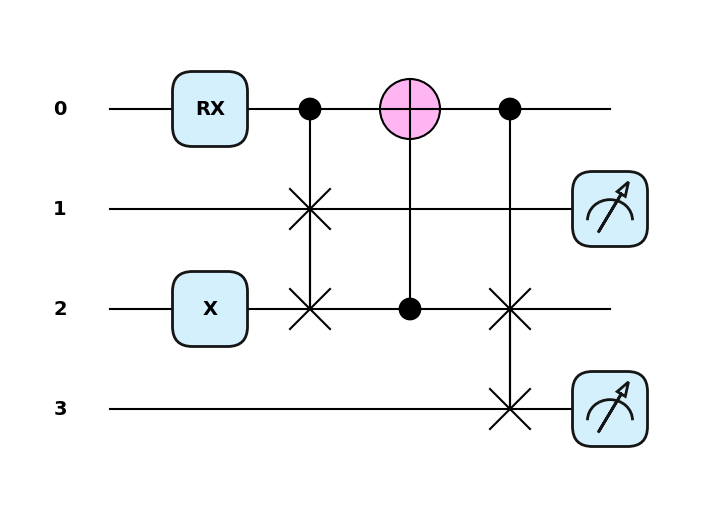

In [2]:
qc = qalton.build_galton_circuit(levels=2, num_shots=1000, bias=0.5, coherence=False)
print(qc())
qml.draw_mpl(qc, style="pennylane")()

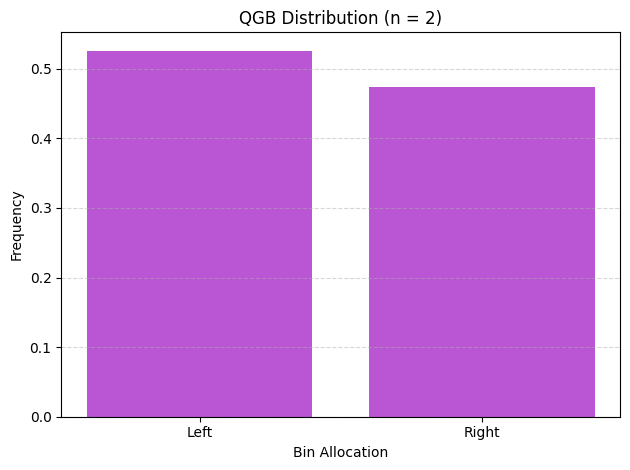

In [3]:
probs = qc()
probs

prob_left = probs[int("01", 2)]
prob_right = probs[int("10", 2)]

#Plotting time!
plt.bar([0, 1], [prob_left, prob_right], color='mediumorchid')
plt.xticks([0, 1], ['Left', 'Right'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 2)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3-Peg QGB

[0.    0.261 0.501 0.    0.238 0.    0.    0.   ]


(<Figure size 1700x775 with 1 Axes>, <Axes: >)

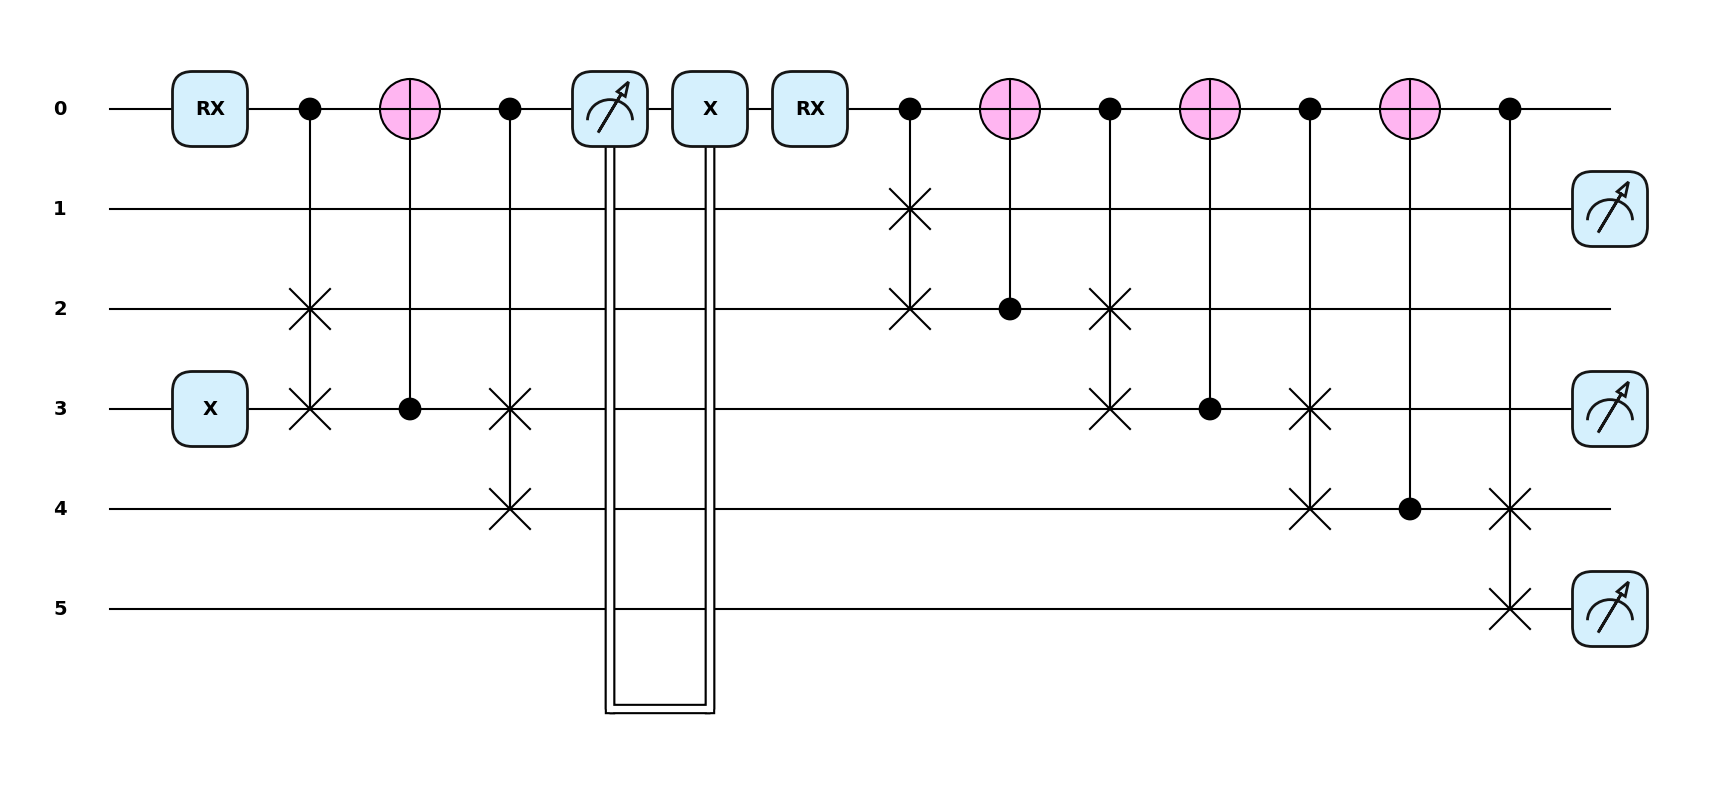

In [4]:
qc = qalton.build_galton_circuit(levels=3, num_shots=1000, bias=0.5, coherence=False)
print(qc())
qml.draw_mpl(qc, style="pennylane")()

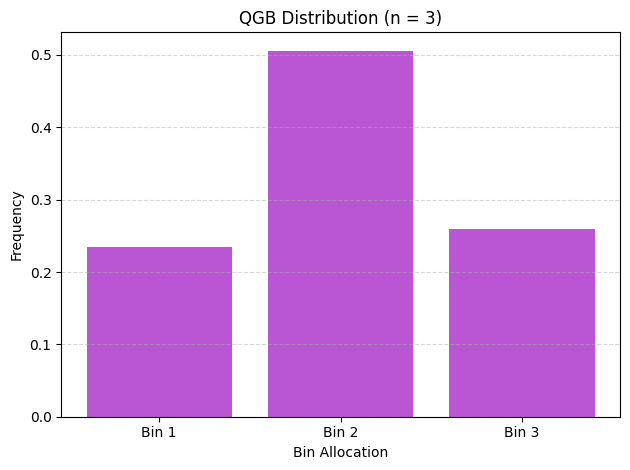

In [5]:
probs = qc()
probs

bin_1 = probs[int("001", 2)]
bin_2 = probs[int("010", 2)]
bin_3 = probs[int("100", 2)]

#Plotting time!
plt.bar([0, 1, 2], [bin_1, bin_2, bin_3], color='mediumorchid')
plt.xticks([0, 1, 2], ['Bin 1', 'Bin 2', 'Bin 3'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 3)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6-Peg QGB

(<Figure size 3100x1000 with 1 Axes>, <Axes: >)

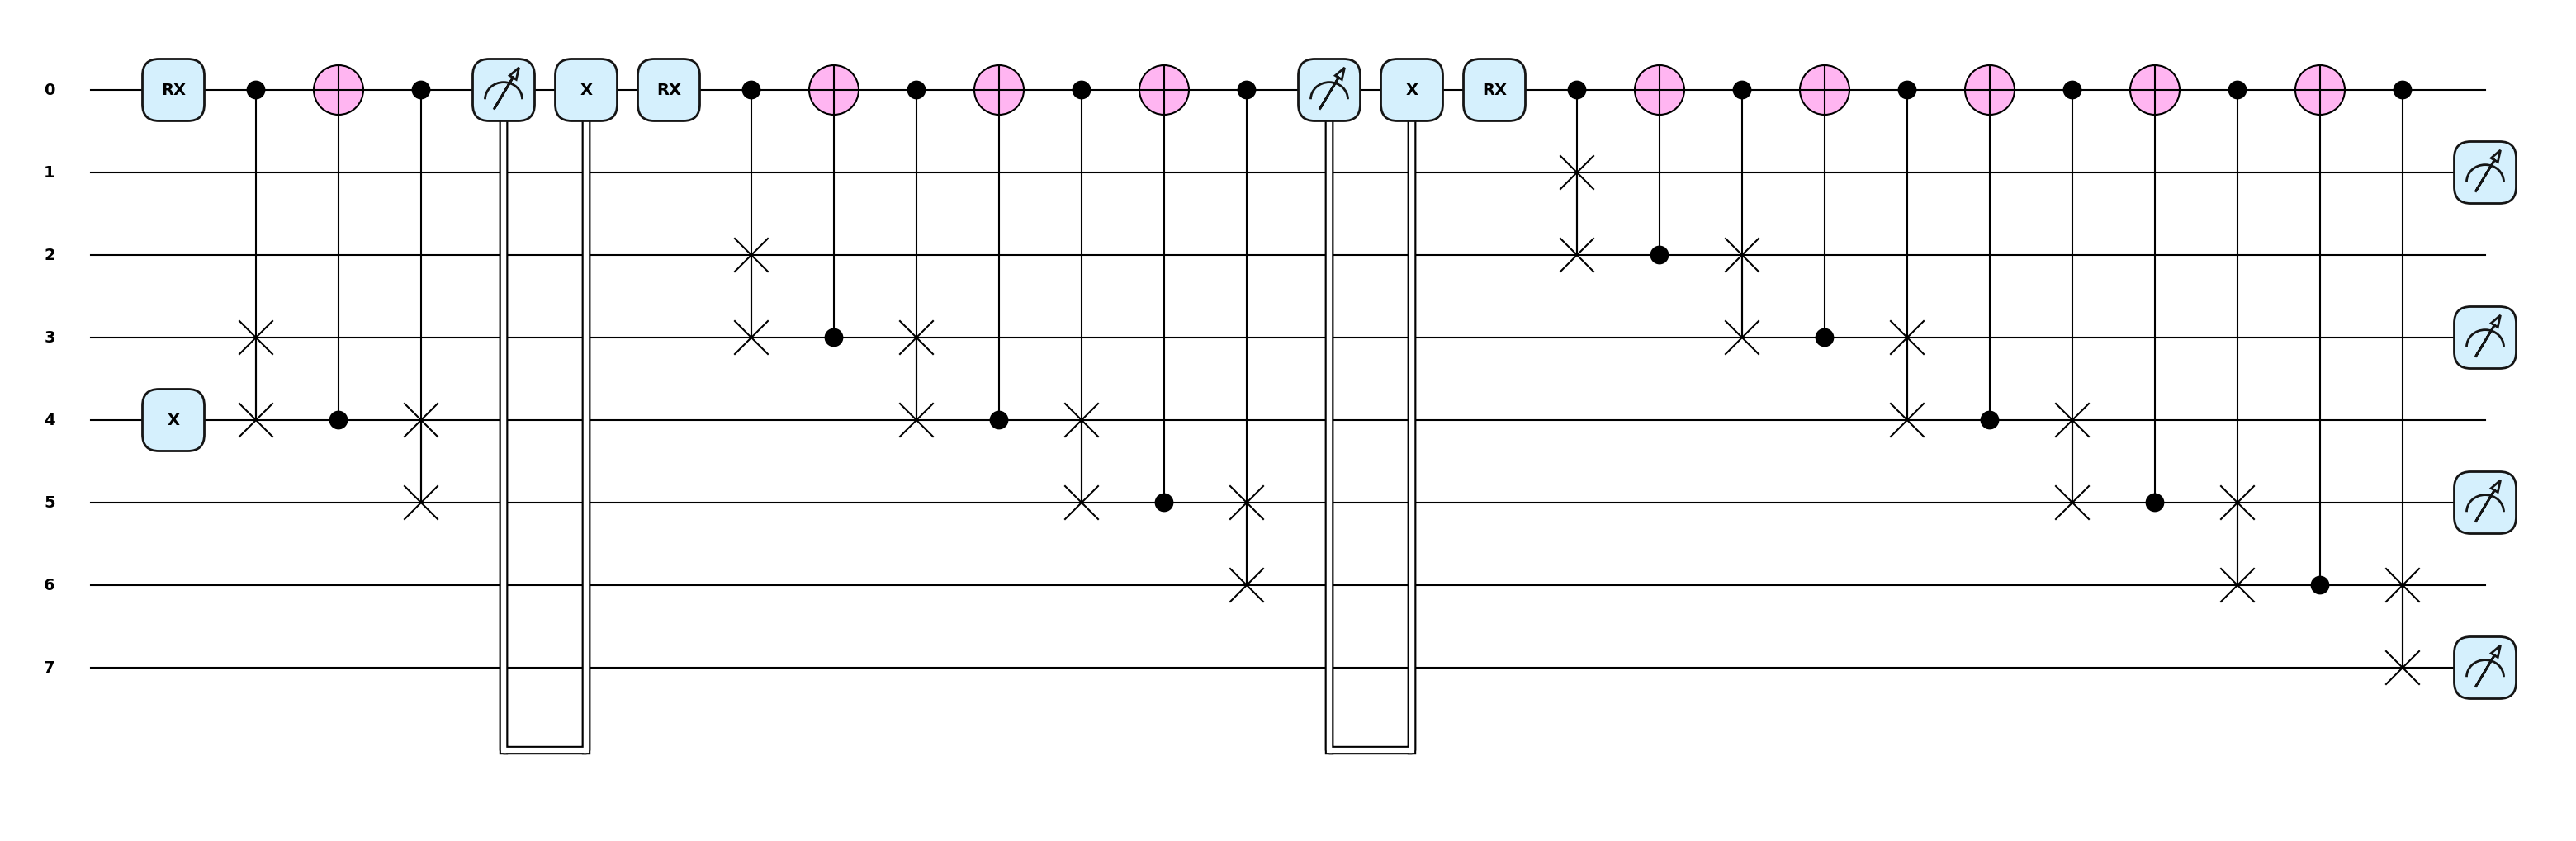

In [12]:
qc = qalton.build_galton_circuit(levels=4, num_shots=1000, bias = 0.5, coherence=False)
qml.draw_mpl(qc, style="pennylane")()

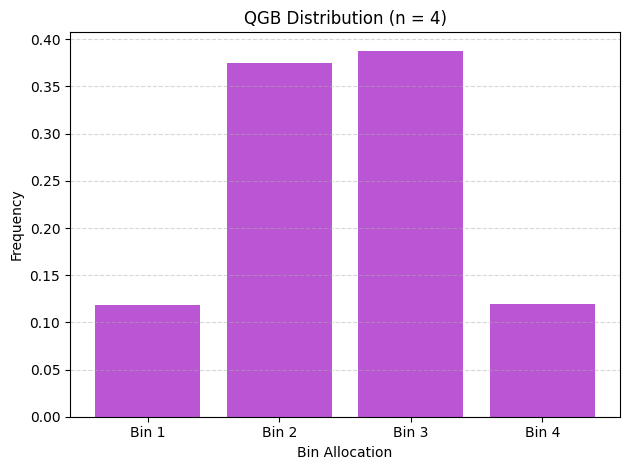

In [13]:
probs = qc()
probs

bin_1 = probs[int("0001", 2)]
bin_2 = probs[int("0010", 2)]
bin_3 = probs[int("0100", 2)]
bin_4 = probs[int("1000", 2)]

#Plotting time!
plt.bar([0, 1, 2, 3], [bin_1, bin_2, bin_3, bin_4], color='mediumorchid')
plt.xticks([0, 1, 2, 3], ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 4)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 10-Peg QGB

(<Figure size 4900x1225 with 1 Axes>, <Axes: >)

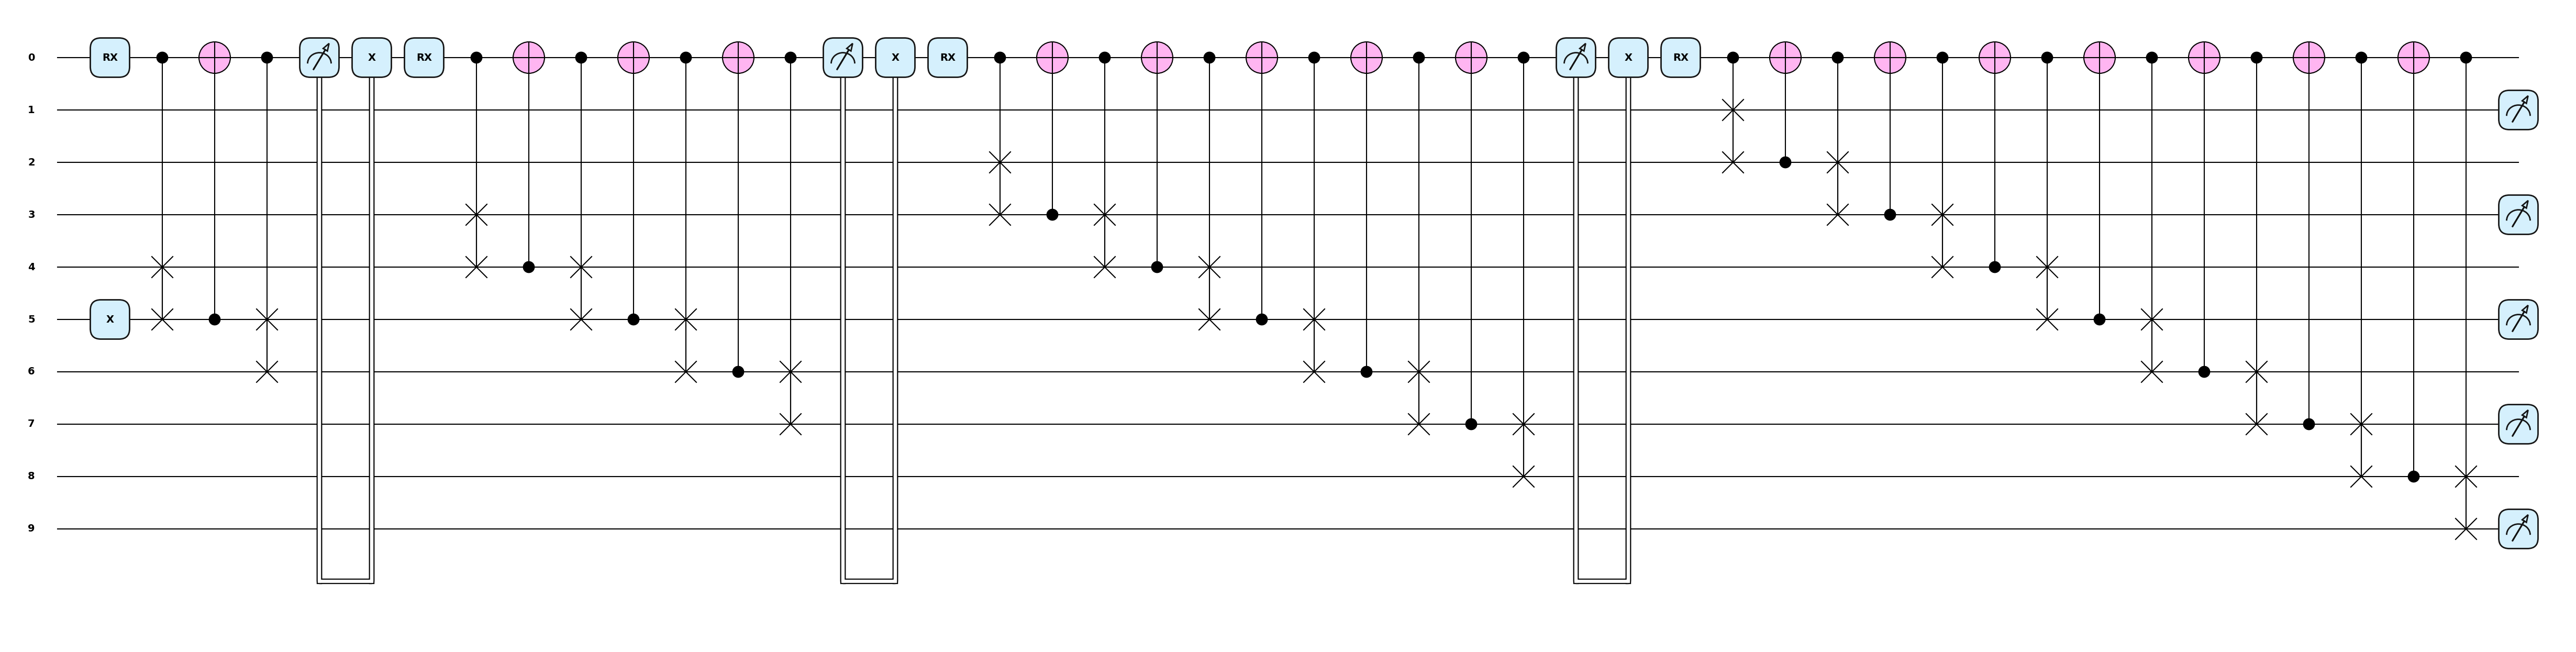

In [8]:
qc = qalton.build_galton_circuit(levels=5, num_shots=1000, bias = 0.5, coherence=False)
qml.draw_mpl(qc, style="pennylane")()

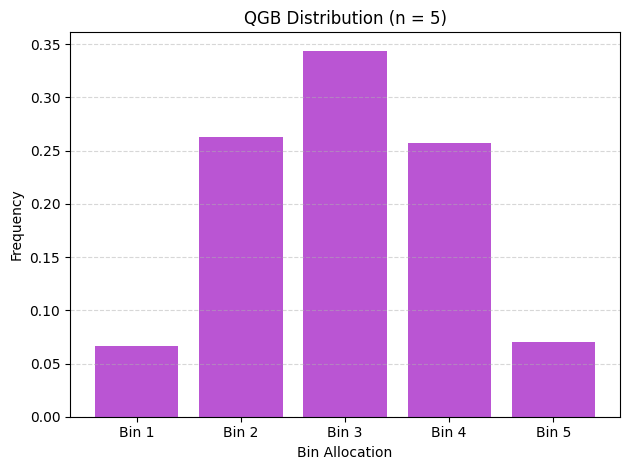

In [10]:
probs = qc()
probs

bin_1 = probs[int("00001", 2)]
bin_2 = probs[int("00010", 2)]
bin_3 = probs[int("00100", 2)]
bin_4 = probs[int("01000", 2)]
bin_5 = probs[int("10000", 2)]

#Plotting time!
plt.bar([0, 1, 2, 3, 4], [bin_1, bin_2, bin_3, bin_4, bin_5], color='mediumorchid')
plt.xticks([0, 1, 2, 3, 4], ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5'])
plt.xlabel("Bin Allocation")
plt.ylabel("Frequency")
plt.title("QGB Distribution (n = 5)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()